In [3]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Daniswara Aditya
[nltk_data]     P\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
#open csv file name "tiktok.csv"    
df = pd.read_csv("data/tiktok.csv",sep=",")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8c029d6c-9282-4034-9838-53f957384007,Amin Santoso,https://play-lh.googleusercontent.com/a-/ALV-U...,Tiktok sangat bagus. Bisa berkarya dan mendapa...,5,622,34.3.3,2024-04-20 20:26:25,NaN,NaN,34.3.3
1,5be47d92-8ede-4f9a-a613-3107e9bfbde2,monica hsu,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya suka dengan aplikasi tiktok dan aktif men...,5,1332,33.8.5,2024-03-13 23:45:22,NaN,NaN,33.8.5
2,a8d020fa-07ac-46e1-9ec1-9a1d6b24abec,Oppo A16,https://play-lh.googleusercontent.com/a/ACg8oc...,Maaf saya kasih 🌟 2 karena aplikasi nya kurang...,2,30,34.5.5,2024-05-04 02:50:04,NaN,NaN,34.5.5
3,26fbfb0b-c11b-46e5-8e8b-d9a2803615ee,Verdi Ximenes,https://play-lh.googleusercontent.com/a-/ALV-U...,Tiktok nya sangat bagus tapi pas di buka video...,3,57,33.8.5,2024-04-18 20:02:07,NaN,NaN,33.8.5
4,07d94c25-28a3-4b6d-a404-720513cf1c9a,Nenk shinta,https://play-lh.googleusercontent.com/a-/ALV-U...,Kenapa dengan tiktok saya pas buka muter muter...,2,1799,34.1.5,2024-04-08 15:41:52,NaN,NaN,34.1.5


In [56]:
df.shape

(398, 11)

In [57]:
df = df[['content','score']]

def clean_data(df):
    df.dropna()
    df.drop_duplicates(subset='content')
    
    return df
df = clean_data(df)
df.shape

(398, 2)

In [58]:
df.isnull().sum()

content    0
score      0
dtype: int64

In [59]:
def clean_tiktok_data(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?://\S+', '', text)
    
    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

df['content'] = df['content'].apply(clean_tiktok_data)


In [60]:
df['content'] = df['content'].str.lower()

In [61]:
df.head()

,content,score
0,tiktok sangat bagus bisa berkarya dan mendapat...,5
1,saya suka dengan aplikasi tiktok dan aktif men...,5
2,maaf saya kasih 2 karena aplikasi nya kurang b...,2
3,tiktok nya sangat bagus tapi pas di buka video...,3
4,kenapa dengan tiktok saya pas buka muter muter...,2


Prepocessing

In [62]:
score = df['score']

In [63]:
def filtertoken_by_length(data, column, min_words, max_words):
    w_count = data[column].astype(str).apply(lambda x: len(x.split()))
    mask = (w_count >= min_words) & (w_count <= max_words)
    filtered_df = data[mask]
    return filtered_df

df = filtertoken_by_length(df, 'content', 3, 50)

In [64]:
#normalisasi
norm = {
    ' muter ': ' putar ',
    ' gk ': ' tidak ',
    ' tiktokkan ': ' tiktok ',
    ' yg ': ' yang ',
    ' dgn ': ' dengan ',
    ' kpd ': ' kepada ',
    ' klo ': ' kalau ',
    ' gmana ': ' bagaimana ',
    ' blg ': ' bilang ',
    ' trs ': ' terus ',
    ' tdk ': ' tidak ',
    ' krn ': ' karena ',
    ' sj ': ' saja ',
    ' dlm ': ' dalam ',
    ' sblm ': ' sebelum ',
    ' ktm ': ' ketemu ',
    ' brg ': ' barang ',
    ' hrs ': ' harus ',
    ' lgsg ': ' langsung ',
    ' tmn ': ' teman ',
    ' sy ': ' saya ',
    ' bhw ': ' bahwa ',
    ' udh ': ' sudah ',
    ' sm ': ' sama ',
    ' cmn ': ' cuma ',
    ' nggak ': ' tidak ',
    ' bs ': ' bisa ',
    ' dr ': ' dari ',
    ' smg ': ' semoga ',
    ' btw ': ' omong-omong ',
    ' gimana ': ' bagaimana ',
    ' btw ': ' by the way ',
    ' bgt ': ' banget ',
    ' kalo ': ' kalau ',
    ' sbnrnya ': ' sebenarnya ',
    ' abis ': ' habis ',
    ' td ': ' tadi ',
    ' trs ': ' terus ',
    ' spt ': ' seperti ',
    ' kmrn ': ' kemarin ',
    ' mlm ': ' malam ',
    ' pgn ': ' ingin ',
    ' tmpt ': ' tempat ',
    ' brkt ': ' berangkat ',
    ' dl ': ' dulu ',
    ' dpn ': ' depan ',
    ' byk ': ' banyak ',
    ' syg ': ' sayang ',
    ' klh ': ' kalah ',
    ' mksd ': ' maksud ',
    ' apa2 ': ' apa-apa ',
    ' mnrt ': ' menurut ',
    ' msh ': ' masih ',
    ' pdhl ': ' padahal ',
    ' org ': ' orang ',
    ' scr ': ' secara ',
    ' hrsnya ': ' seharusnya ',
    ' krg ': ' kurang ',
    ' bsok ': ' besok ',
    ' jg ': ' juga ',
    ' lg ': ' lagi ',
    ' prnh ': ' pernah ',
    ' sll ': ' selalu ',
    ' jd ': ' jadi ',
    ' ttp ': ' tetap ',
    ' klwrga ': ' keluarga ',
    ' sakitnya ': ' sakit ',
    ' tp ': ' tapi ',
    ' utk ': ' untuk ',
    ' klu ': ' kalau ',
    ' py ': ' punya ',
    ' stlh ': ' setelah ',
    ' tdk ': ' tidak ',
    ' td ': ' tadi ',
    ' tmbh ': ' tambah ',
    ' sgt ': ' sangat ',
    ' bhkan ': ' bahkan ',
    ' dg ': ' dengan ',
    ' jgn ': ' jangan ',
    ' knp ': ' kenapa ',
    ' mrk ': ' mereka ',
    ' mn ': ' mana ',
    ' plg ': ' paling ',
    ' ntr ': ' nanti ',
    ' ntar ': ' nanti ',
    ' bsk ': ' besok ',
    ' blm ': ' belum ',
    ' smua ': ' semua ',
    ' skrg ': ' sekarang ',
    ' aja ': ' saja ',
    ' dpt ': ' dapat ',
    ' trus ': ' terus ',
    ' ngapain ': ' apa yang dilakukan ',
    ' gpp ': ' nggak apa-apa ',
    ' dah ': ' sudah ',
    ' jdul ': ' judul ',
    ' plis ': ' tolong ',
    ' mlh ': ' malah ',
    ' klian ': ' kalian ',
    ' mlaku ': ' berjalan ',
    ' kta ': ' kata ',
    ' segala ': ' segala ',
    ' dlm ': ' dalam ',
    ' knp ': ' kenapa ',
    ' mending ': ' lebih baik ',
    ' kayak ': ' seperti ',
    ' sekali ': ' sekali ',
    ' pd ': ' pada ',
    ' saat ': ' ketika ',
    ' sdh ': ' sudah ',
    ' ksh ': ' kasih ',
    ' jwb ': ' jawab ',
    ' mnt ': ' minta ',
    ' mlaku ': ' berjalan ',
    ' dpn ': ' depan ',
    ' ktm ': ' ketemu ',
    ' prnh ': ' pernah ',
    ' tmbh ': ' tambah '
}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))

In [65]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

df['content'] = df['content'].apply(lambda x: stopword(x))

In [66]:
#tokenized
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0      [tiktok, sangat, bagus, berkarya, mendapat, te...
2      [maaf, kasih, 2, aplikasi, nya, kurang, bagus,...
3      [tiktok, nya, sangat, bagus, pas, buka, video,...
4      [dengan, tiktok, pas, buka, putar, muter, pada...
5      [makin, update, malah, oploadnya, selalu, gaga...
                             ...                        
393    [hallo, sangat, kecewa, sama, tiktok, saya, pu...
394    [aplikasi, sangat, penting, menghibur, menarik...
395    [aplikasi, sangat, bagus, menghibur, sayang, h...
396    [banyak, ilmu, didapat, untuk, pengalaman, dis...
397    [filter, yang, bisa, dipakai, walaupun, di, up...
Name: content, Length: 381, dtype: object

In [67]:
#stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)

tiktok sangat bagus karya dapat teman banyak bagai daerah jika untung hasil cuan moga tiktok tambah fitur bagai fasilitas sukses and maju tiktok
maaf kasih 2 aplikasi nya kurang bagus padahal jaring full klw udah buka sekali ga di buka lqi
tiktok nya sangat bagus pas buka video nya nonton tidak kapai jadi di baik yakkk tiktok paling the best
dengan tiktok pas buka putar muter padahal wifi penuh gambar nya putar hitam gak gambar nya di baik dong
makin update malah oploadnya selalu gagal mulu slalu hapus terus tambah buruk nih aplikasi
terima kasih tik tok untuk tik tok ini masuk dalam peringkat social populer mudah cari mengupdatenya terima kasih
aku suka sama nih tiktok aku serba gagal buat bikin video aku aplod nga like
poko bagus kalau lebih bagus seperti efect kurang lain
kalau mau bikin video lewat templat kadang kadang engga mau simpan video kadang dan kadang engga
aplikasi bagus banget kenapa aku tambah lagu tik tok favorit muncul sana pliss pulih kan
telah baharu wilayah tidak u

In [68]:
#Gabung data
score.drop(columns=["Unnamed: 0"], inplace=True)
df = pd.concat([tokenized, score], axis=1)

Labelling

In [69]:
def label_sentiment(score):
    if score <= 2:
        return 'negatif'
    else:
        return 'positif'
    
df['sentimen'] = df['score'].apply(label_sentiment)
df.head()

,content,score,sentimen
0,tiktok sangat bagus karya dapat teman banyak b...,5,positif
2,maaf kasih 2 aplikasi nya kurang bagus padahal...,2,negatif
3,tiktok nya sangat bagus pas buka video nya non...,3,positif
4,dengan tiktok pas buka putar muter padahal wif...,2,negatif
5,makin update malah oploadnya selalu gagal mulu...,1,negatif


In [ ]:
'''
# save the clean dataset
df.to_csv('data/tiktok_clean.csv', sep=',')
'''

In [70]:
df.sentimen.value_counts()

sentimen
positif    247
negatif    151
Name: count, dtype: int64

In [71]:
data_negatif = df[df['sentimen'] == 'negatif']
data_positif = df[df['sentimen'] == 'positif']

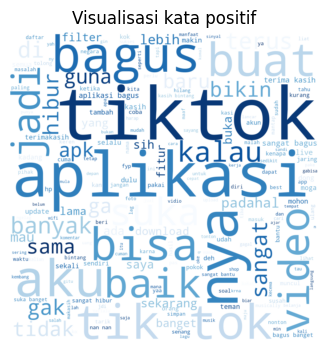

In [72]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

all_text_s1 = ' '.join(str(word) for word in data_positif['content'])
wordcloud = WordCloud(colormap="Blues", width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi kata positif")
plt.margins(x=0,y=0)
plt.show()

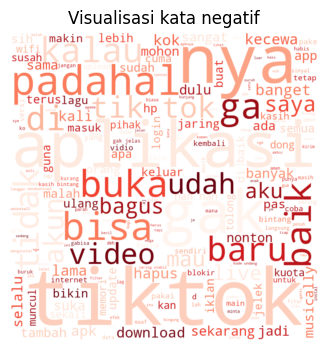

In [73]:
all_text_s1 = ' '.join(str(word) for word in data_negatif['content'])
wordcloud = WordCloud(colormap="Reds", width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi kata negatif")
plt.margins(x=0,y=0)
plt.show()

Splitting data

In [4]:
'''
# load data
df = pd.read_csv("data/tiktok_clean.csv", sep=',')
'''

In [5]:
df = df[['content', 'sentimen']]
df = df.dropna()
df.head()

,content,sentimen
0,tiktok sangat bagus karya dapat teman banyak b...,positif
1,maaf kasih 2 aplikasi nya kurang bagus padahal...,negatif
2,tiktok nya sangat bagus pas buka video nya non...,positif
3,dengan tiktok pas buka putar muter padahal wif...,negatif
4,makin update malah oploadnya selalu gagal mulu...,negatif


In [6]:
x = df.content
y = df.sentimen

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Training Data

In [7]:
from sklearn.svm import SVC

#SVM
tvec = TfidfVectorizer()
clf1 = SVC(kernel='linear')

model_svm = Pipeline([('vectorizer', tvec), 
                      ('classifier', clf1)])

In [8]:
model_svm.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [9]:
hasil_svm = model_svm.predict(x_test)

In [10]:
matrix1 = classification_report(y_test, hasil_svm)
print('Classification Report : \n', matrix1)

Classification Report : 
               precision    recall  f1-score   support

     negatif       0.56      0.64      0.60        22
     positif       0.85      0.80      0.82        55

    accuracy                           0.75        77
   macro avg       0.70      0.72      0.71        77
weighted avg       0.76      0.75      0.76        77



In [11]:
from sklearn.tree import DecisionTreeClassifier

# Define the pipeline
model_dtree = Pipeline([('vectorizer', tvec),
                        ('classifier', DecisionTreeClassifier())
])

# Train the model
model_dtree.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', DecisionTreeClassifier())])

In [12]:
# Make predictions
hasil_dtree = model_dtree.predict(x_test)

In [13]:
# Evaluate the model
matrix2 = classification_report(y_test, hasil_dtree)
print('Classification Report (Decision Tree) : \n', matrix2)

Classification Report (Decision Tree) : 
               precision    recall  f1-score   support

     negatif       0.45      0.68      0.55        22
     positif       0.84      0.67      0.75        55

    accuracy                           0.68        77
   macro avg       0.65      0.68      0.65        77
weighted avg       0.73      0.68      0.69        77



In [14]:
from sklearn.naive_bayes import MultinomialNB

#model naive bayes
model_naiveb = Pipeline([('vectorizer', tvec),
                         ('classifier', MultinomialNB())])

# Train the model
model_naiveb.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [15]:
# Make predictions
hasil_naiveb = model_naiveb.predict(x_test)

In [16]:
# Evaluate the model
matrix3 = classification_report(y_test, hasil_naiveb)
print('Classification Report (Naive Bayes) : \n', matrix3)

Classification Report (Naive Bayes) : 
               precision    recall  f1-score   support

     negatif       0.62      0.23      0.33        22
     positif       0.75      0.95      0.84        55

    accuracy                           0.74        77
   macro avg       0.69      0.59      0.59        77
weighted avg       0.72      0.74      0.69        77



In [17]:
acc1 = accuracy_score(hasil_svm, y_test)
precis1 = precision_score(y_test, hasil_svm, average='weighted')
recal1 = recall_score(y_test, hasil_svm, average='weighted')
f1_1 = f1_score(y_test, hasil_svm, average='weighted')

acc2 = accuracy_score(hasil_dtree, y_test)
precis2 = precision_score(y_test, hasil_dtree, average='weighted')
recal2 = recall_score(y_test, hasil_dtree, average='weighted')
f1_2 = f1_score(y_test, hasil_dtree, average='weighted')

acc3 = accuracy_score(hasil_naiveb, y_test)
precis3 = precision_score(y_test, hasil_naiveb, average='weighted')
recal3 = recall_score(y_test, hasil_naiveb, average='weighted')
f1_3 = f1_score(y_test, hasil_naiveb, average='weighted')

In [18]:
model = {'Model':['SVM',
                  'Decision Tree',
                  'Naive Bayes Multinomial'],
         'Accuracy':[acc1, acc2, acc3],
         'Precision':[precis1, precis2, precis3],
         'Recall':[recal1, recal2, recal3],
         'F1-score':[f1_1, f1_2, f1_3]
         
         }

report_model = pd.DataFrame(model)
report_model

,Model,Accuracy,Precision,Recall,F1-score
0,SVM,0.753247,0.764396,0.753247,0.757663
1,Decision Tree,0.675325,0.730519,0.675325,0.689755
2,Naive Bayes Multinomial,0.740260,0.716874,0.740260,0.694316


In [22]:
'''# Save the model using joblib 
import joblib

joblib.dump(model_svm, 'model/svm_model.pkl')
joblib.dump(model_dtree, 'model/decisionTree_model.pkl')
joblib.dump(model_naiveb, 'model/naiveBayes_model.pkl')
 
# load model
model_svm = joblib.load('model/svm_model.pkl')
model_dtree = joblib.load('model/decisionTree_model.pkl')
model_naiveb = joblib.load('model/naiveBayes_model.pkl')'''

['naiveBayes_model.pkl']

Testing

In [23]:
def classify_text(input_text):
    models = [
        ('SVM', model_svm),
        ('Decison Tree', model_dtree),
        ('Naive Bayes Multinomial', model_naiveb)
    ]
    
    result = {}
    
    for name, model in models:
        prediction = model.predict([input_text])
        result[name] = prediction[0]
    
    return result

In [24]:
model_svm = model_svm.fit(x_train, y_train)
model_dtree = model_dtree.fit(x_train, y_train)
model_naiveb = model_naiveb.fit(x_train, y_train)

In [28]:
input_text = input("Masukkan text yang ingin diklasifikasikan:")

result = classify_text(input_text)

print("Input kata :", input_text)

print("\nHasil klasifikasi :")
for model, prediction in result.items():
    print(f"{model}: {prediction}")

Input kata : aplikasi sangat bermanfaat dan informatif

Hasil klasifikasi :
SVM: positif
Decison Tree: positif
Naive Bayes Multinomial: positif
